#          DBSCAN
# 1. Khai báo và import

In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelBinarizer

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, LSTM, MaxPool1D, Flatten, Dropout # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils.vis_utils import plot_model

In [3]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count", 
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

In [4]:
train='./KDDTrain+.txt'
test='./KDDTest+.txt'
data=pd.read_csv(train,names=feature)
test_data=pd.read_csv(test,names=feature)

In [5]:

test_data.shape

(22544, 43)

In [6]:
data.shape

(125973, 43)

In [7]:
# phân loại lớp 
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

change_label(data)
change_label(test_data)

In [8]:
# xóa 'difficulty_level'
data.drop(['difficulty'],axis=1,inplace=True)
test_data.drop(['difficulty'],axis=1,inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

# 2. Exploring

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


# 3. Chuẩn hóa

In [12]:
# tạo datafreame labels (Dos,Probe,R2L,U2R,normal)
label = pd.DataFrame(data.label)
label1 = pd.DataFrame(test_data.label)

In [13]:
minmax_scaler = MinMaxScaler()
def normalization(df, col):
    for i in col:
        arr = df[i]
        arr = np.array(arr)
        df[i] = minmax_scaler.fit_transform(arr.reshape(len(arr), 1))
    return df

numeric_col = data.select_dtypes(include='number').columns
data = normalization(data, numeric_col)

numeric_col = test_data.select_dtypes(include='number').columns
test_data = normalization(test_data, numeric_col)

In [14]:
le2 = preprocessing.LabelEncoder()
enc_label = label.apply(le2.fit_transform)
data['intrusion'] = enc_label
print(data.shape)
data
enc_label = label1.apply(le2.fit_transform)
test_data['intrusion'] = enc_label

(125973, 43)


In [15]:
data.drop(labels= ['label'], axis=1, inplace=True)
test_data.drop(labels= ['label'], axis=1, inplace=True)

In [16]:
# one-hot-encoding categorical columns
data = pd.get_dummies(data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")  
test_data = pd.get_dummies(test_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="")  
print(data.shape)

(125973, 123)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 123 entries, duration to SH
dtypes: float64(38), int32(1), uint8(84)
memory usage: 47.1 MB


In [18]:
data.info

<bound method DataFrame.info of         duration     src_bytes     dst_bytes  land  wrong_fragment  urgent  \
0       0.000000  3.558064e-07  0.000000e+00   0.0             0.0     0.0   
1       0.000000  1.057999e-07  0.000000e+00   0.0             0.0     0.0   
2       0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
3       0.000000  1.681203e-07  6.223962e-06   0.0             0.0     0.0   
4       0.000000  1.442067e-07  3.206260e-07   0.0             0.0     0.0   
...          ...           ...           ...   ...             ...     ...   
125968  0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
125969  0.000186  7.608895e-08  1.106923e-07   0.0             0.0     0.0   
125970  0.000000  1.616709e-06  2.931438e-07   0.0             0.0     0.0   
125971  0.000000  0.000000e+00  0.000000e+00   0.0             0.0     0.0   
125972  0.000000  1.094232e-07  0.000000e+00   0.0             0.0     0.0   

        hot  num_failed_logins 

# =========================================================

In [19]:
# tạo 2 dataframe một không có label một là dữ liệu còn lại
y_test= test_data['intrusion']
X_test= test_data.drop(labels=['intrusion'], axis=1)

print('X_test has shape:',X_test.shape,'\ny_test has shape:',y_test.shape)

X_test has shape: (22544, 116) 
y_test has shape: (22544,)


In [20]:
# tạo 2 dataframe một không có label một là dữ liệu còn lại
y_train= data['intrusion']
X_train= data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train.shape,'\ny_train has shape:',y_train.shape)

X_train has shape: (125973, 122) 
y_train has shape: (125973,)


In [21]:
X_train.iloc[125968]

duration          0.0
src_bytes         0.0
dst_bytes         0.0
land              0.0
wrong_fragment    0.0
                 ... 
S1                0.0
S2                0.0
S3                0.0
SF                0.0
SH                0.0
Name: 125968, Length: 122, dtype: float64

In [22]:

#y_data = LabelBinarizer().fit_transform(y_data)
#X_data=np.array(X_data)
#y_data=np.array(y_data)

In [23]:
#X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.30, random_state=42)
#print(X_train.shape,'\n',X_test.shape)

In [24]:
y_train.value_counts()

4    67343
0    45927
1    11656
2      995
3       52
Name: intrusion, dtype: int64

# 4. DBSCAN

In [25]:
DBS_clustering = DBSCAN(eps=0.8, min_samples=850).fit(X_train)
#DBS_clustering.predict(X_test)
DBSCAN_clustered = X_train.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points

In [26]:
DBS_clustering.labels_

array([ 0,  5,  1, ..., 10, -1,  4], dtype=int64)

In [27]:
y_train

0         4
1         4
2         0
3         4
4         4
         ..
125968    0
125969    4
125970    4
125971    0
125972    4
Name: intrusion, Length: 125973, dtype: int32

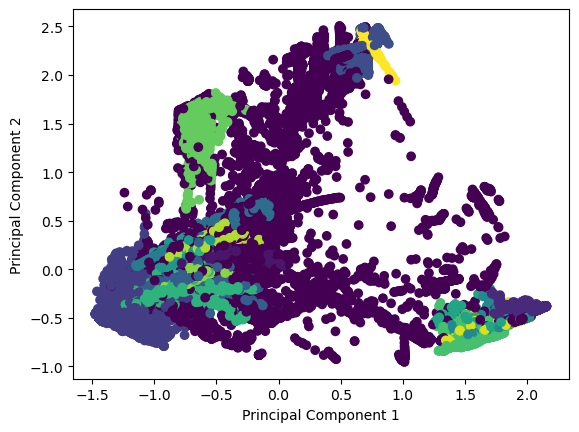

In [28]:
from sklearn.decomposition import PCA

# Giảm số chiều dữ liệu xuống còn 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

# Trực quan hóa dữ liệu với scatter plot
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=DBS_clustering.labels_, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [29]:
# Convert target variable to binary classification
y = y_train.apply(lambda x: 'normal' if x == 4 else 'attack')

# Label the data points with cluster IDs
labels = DBS_clustering.labels_

# Create a DataFrame to store attack points


# Evaluate the clustering with crosstab
print(pd.crosstab(y, labels, rownames=['True Label'], colnames=['Cluster ID']))



Cluster ID    -1     0      1      2     3     4     5     6     7     8   \
True Label                                                                  
attack      28997    22  12747    858  3474   586   195  3477  1076     0   
normal       7337  1513      0  34687     0  3298  1868     0     0  8703   

Cluster ID    9     10    11    12   13    14    15   16  
True Label                                                
attack      1128    17  1070     0  306  2590  1179  908  
normal         0  6636     0  2420  770   111     0    0  


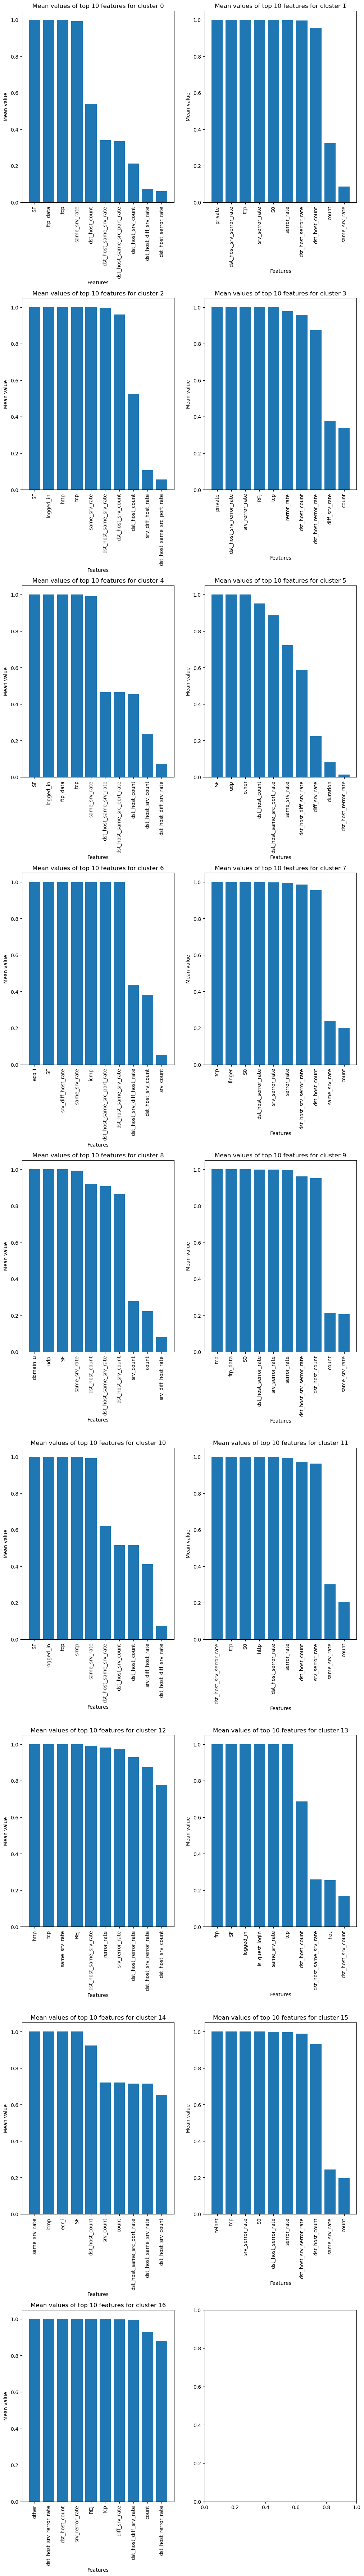

In [39]:
import math

cluster_indices = np.where(DBS_clustering.labels_ != -1)
cluster_data = X_train.iloc[cluster_indices]
cluster_labels = y_train.iloc[cluster_indices]
cluster_ids = np.unique(DBS_clustering.labels_[cluster_indices])

n_cols = 2  # Số lượng cột của grid subplot
n_rows = math.ceil(len(cluster_ids) / n_cols)  # Số lượng dòng của grid subplot

fig, axes = plt.subplots(n_rows, n_cols, figsize=(150, 250))  # Kích thước của grid subplot
axes = axes.flatten()  # Chuyển grid subplot thành một mảng 1 chiều để dễ truy cập

for i, cluster_id in enumerate(cluster_ids):
    # Lọc dữ liệu thuộc cụm hiện tại
    indices = np.where(DBS_clustering.labels_ == cluster_id)
    data = X_train.iloc[indices]
    labels = y_train.iloc[indices]

    # Tính số lượng mẫu và số lượng đặc trưng
    n_samples, n_features = data.shape

    # Tính mean và std cho từng đặc trưng
    feature_means = np.mean(data, axis=0)
    feature_stds = np.std(data, axis=0)

    # Sắp xếp các đặc trưng theo thứ tự giảm dần
    feature_order = np.argsort(feature_means)[::-1]

    # Vẽ biểu đồ cho cụm hiện tại
    ax = axes[i]  # Truy cập subplot tương ứng
    ax.bar(range(10), feature_means[feature_order][:10])
    ax.set_xticks(range(10))
    ax.set_xticklabels(X_train.columns[feature_order][:10], rotation=90)
    ax.set_xlabel('Features')
    ax.set_ylabel('Mean value')
    ax.set_title(f'Mean values of top 10 features for cluster {cluster_id}')
    fig.set_size_inches(12, 90)
    fig.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [56]:
attack_types = np.unique(y_train)
labels = DBS_clustering.labels_
for attack_type in attack_types:
    print(f"Metrics for {attack_type} attacks:")
    y_true = (y_train == attack_type)
    y_pred2 = (labels == -1) | (y_train == attack_type) # anomaly or same attack type
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred2).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1_score:.4f}\n")
    print("=================================\n")

Metrics for 0 attacks:


ValueError: operands could not be broadcast together with shapes (22544,) (125973,) 

In [234]:
y_train = pd.Categorical(y_train)
y_test = pd.Categorical(y_test)

In [235]:
# Chuyển đổi nhãn sang dạng one-hot
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

ValueError: invalid literal for int() with base 10: 'Probe'